### Importing Libraries and Data

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import sklearn.metrics as sm
import re

In [236]:
df = pd.read_csv('website_classification.csv')
df.head()

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [237]:
df.info() #checking if there is any Nan or null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   website_url           1441 non-null   object
 1   cleaned_website_text  1441 non-null   object
 2   Category              1441 non-null   object
dtypes: object(3)
memory usage: 33.9+ KB


In [238]:
df

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
...,...,...,...
1436,https://michaelnielsen.org/ddi/how-the-bitcoin...,how the bitcoin protocol actually works ddihow...,Cryptocurrency
1437,https://www.cryptoview.com/,cryptoview cryptocurrency portfolio manager mu...,Cryptocurrency
1438,https://www.reddit.com/r/ethdev/,ethereum development and dappsrethdev ethereum...,Cryptocurrency
1439,https://dogelonmars.com/,dogelon marsdogelon to marscommunity comics ge...,Cryptocurrency


### Visualising distribution of website categories

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   website_url           1441 non-null   object
 1   cleaned_website_text  1441 non-null   object
 2   Category              1441 non-null   object
dtypes: object(3)
memory usage: 33.9+ KB


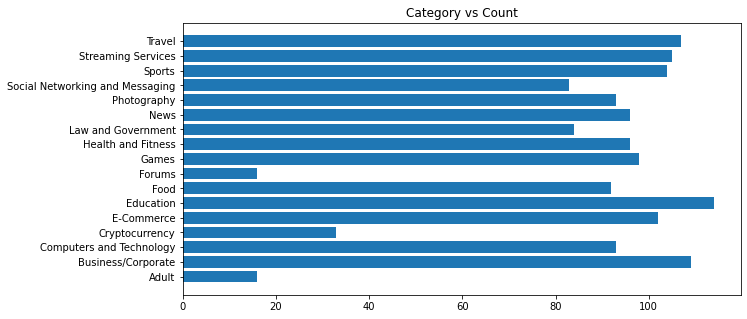

In [240]:
#visualising the count of each category
plt.figure(figsize=(10,5))
plt.title("Category vs Count")
site_category_count = pd.DataFrame(df.groupby(df['Category']).size(),columns=['Count'])
plt.barh(width=site_category_count['Count'],y=site_category_count.index)
plt.show()

In [241]:
site_category_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Adult to Travel
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   17 non-null     int64
dtypes: int64(1)
memory usage: 272.0+ bytes


In [242]:
print("Different categories of websites: ",len(site_category_count["Count"]))

Different categories of websites:  17


### Data Cleaning & Engineering

##### NLP pipeline
##### 1. Text processing
######    - Cleaning
######    - Normalization (changing to lowercase and removing punctuation)
######    - Word Tokenisation
######    - Remove stop words
######    - Remove Non-alpha text
######    - Word Stemming and Lemmatization

##### 2. Feature Engineering
######    - Label Encoding for Categories
######    - Bag of Words (CountVectorizer)
######    - TF-IDF (Bag of Words + Tf-IDF = TfidfVectorizer)
######    - Word Embeddings (word2vec/glove)

##### 3. Feature Selection

In [243]:
#dropping url link as it is not important anymore
df.drop(columns=['website_url'],inplace=True)

In [244]:
df.tail()

,cleaned_website_text,Category
1436,how the bitcoin protocol actually works ddihow...,Cryptocurrency
1437,cryptoview cryptocurrency portfolio manager mu...,Cryptocurrency
1438,ethereum development and dappsrethdev ethereum...,Cryptocurrency
1439,dogelon marsdogelon to marscommunity comics ge...,Cryptocurrency
1440,mycrypto ethereum wallet managersecurely manag...,Cryptocurrency


Normalizing text: convert to lowercase and remove punctuation

In [245]:
df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: x.lower())
df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: re.sub(r'[^\w\s]','',x))

In [246]:
df.head()

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,Travel
1,expedia hotel book sites like use vacation wor...,Travel
2,tripadvisor hotel book sites like previously d...,Travel
3,cheap flights search compare flights momondo f...,Travel
4,bot create free account create free account si...,Travel


Tokenising: Split sentence into list of words

In [247]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: word_tokenize(x))
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_website_text,Category
0,"[official, site, good, hotel, accommodation, b...",Travel
1,"[expedia, hotel, book, sites, like, use, vacat...",Travel
2,"[tripadvisor, hotel, book, sites, like, previo...",Travel
3,"[cheap, flights, search, compare, flights, mom...",Travel
4,"[bot, create, free, account, create, free, acc...",Travel
...,...,...
1436,"[how, the, bitcoin, protocol, actually, works,...",Cryptocurrency
1437,"[cryptoview, cryptocurrency, portfolio, manage...",Cryptocurrency
1438,"[ethereum, development, and, dappsrethdev, eth...",Cryptocurrency
1439,"[dogelon, marsdogelon, to, marscommunity, comi...",Cryptocurrency


Removing Stopwords

In [248]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: [word for word in x if word not in stop_words])
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_website_text,Category
0,"[official, site, good, hotel, accommodation, b...",Travel
1,"[expedia, hotel, book, sites, like, use, vacat...",Travel
2,"[tripadvisor, hotel, book, sites, like, previo...",Travel
3,"[cheap, flights, search, compare, flights, mom...",Travel
4,"[bot, create, free, account, create, free, acc...",Travel
...,...,...
1436,"[bitcoin, protocol, actually, works, ddihow, b...",Cryptocurrency
1437,"[cryptoview, cryptocurrency, portfolio, manage...",Cryptocurrency
1438,"[ethereum, development, dappsrethdev, ethereum...",Cryptocurrency
1439,"[dogelon, marsdogelon, marscommunity, comics, ...",Cryptocurrency


Word Stemming and Lemmatization

In [249]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return 'a'
    elif nltk_tag.startswith('V'):
        return 'v'
    elif nltk_tag.startswith('R'):
        return 'r'
    else:
        return 'n'
    
#Define function to lemmatize each word with its POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text)
    pos_tagged_text = [(word, pos_tagger(pos_tag)) for word, pos_tag in pos_tagged_text]
    return [lem.lemmatize(word, pos_tag) for word, pos_tag in pos_tagged_text]

df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: lemmatize_words(x))
df

,cleaned_website_text,Category
0,"[official, site, good, hotel, accommodation, b...",Travel
1,"[expedia, hotel, book, site, like, use, vacati...",Travel
2,"[tripadvisor, hotel, book, site, like, previou...",Travel
3,"[cheap, flight, search, compare, flight, momon...",Travel
4,"[bot, create, free, account, create, free, acc...",Travel
...,...,...
1436,"[bitcoin, protocol, actually, work, ddihow, bi...",Cryptocurrency
1437,"[cryptoview, cryptocurrency, portfolio, manage...",Cryptocurrency
1438,"[ethereum, development, dappsrethdev, ethereum...",Cryptocurrency
1439,"[dogelon, marsdogelon, marscommunity, comic, g...",Cryptocurrency


In [250]:
#joining tokenized words
df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: ' '.join(x))

Feature extraction: Label Encoding

In [251]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,16
1,expedia hotel book site like use vacation work...,16
2,tripadvisor hotel book site like previously de...,16
3,cheap flight search compare flight momondo fin...,16
4,bot create free account create free account si...,16
...,...,...
1436,bitcoin protocol actually work ddihow bitcoin ...,3
1437,cryptoview cryptocurrency portfolio manager mu...,3
1438,ethereum development dappsrethdev ethereumrela...,3
1439,dogelon marsdogelon marscommunity comic get st...,3


In [252]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['cleaned_website_text'],df['Category'],test_size=0.2,random_state=0)

Feature extraction: Tf-idf vectorizer

In [253]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_id_vectorizer = TfidfVectorizer(max_features=5000)
tf_id_train = tf_id_vectorizer.fit_transform(X_train)
tf_id_test = tf_id_vectorizer.transform(X_test)

In [254]:
tf_id_train = tf_id_train.toarray()
tf_id_test = tf_id_test.toarray()

Model training

In [266]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.2)
model.fit(tf_id_train,y_train)

MultinomialNB(alpha=0.2)

In [267]:
import sklearn.metrics as sm

y_pred = model.predict(tf_id_test)
print(f'The accuracy of train model is {sm.accuracy_score(y_train,model.predict(tf_id_train))}')
print(f'The accuracy of test model is {sm.accuracy_score(y_test,y_pred)}')

The accuracy of train model is 0.9800347222222222
The accuracy of test model is 0.9204152249134948


In [268]:
from bs4 import BeautifulSoup
import bs4 as bs4
from urllib.parse import urlparse
import requests
from collections import Counter
import pandas as pd
import os


class ScrapTool:
    def visit_url(self,website_url):
        '''
        Visit URL. Download the Content. Initialize the beautifulsoup object. Call parsing methods. Return Series object.
        '''
        content = requests.get(website_url,timeout=60).content
        soup = BeautifulSoup(content,'lxml')
        result = {
            "website_url": website_url,
            "website_name": self.get_website_name(website_url),
            "website_text": self.get_html_title_tag(soup)+self.get_html_meta_tags(soup)+self.get_html_heading_tags(soup)+
                                                               self.get_text_content(soup)
        }
        
        #Convert to Series object and return
        return pd.Series(result)
    
    def get_website_name(self,website_url):
        '''
        Example: returns "google" from "www.google.com"
        '''
        return "".join(urlparse(website_url).netloc.split(".")[-2])
    
    def get_html_title_tag(self,soup):
        '''Return the text content of <title> tag from a webpage'''
        return '. '.join(soup.title.contents)
    
    def get_html_meta_tags(self,soup):
        '''Returns the text content of <meta> tags related to keywords and description from a webpage'''
        tags = soup.find_all(lambda tag: (tag.name=="meta") & (tag.has_attr('name') & (tag.has_attr('content'))))
        content = [str(tag["content"]) for tag in tags if tag["name"] in ['keywords','description']]
        return ' '.join(content)
    
    def get_html_heading_tags(self,soup):
        '''returns the text content of heading tags. The assumption is that headings might contain relatively important text.'''
        tags = soup.find_all(["h1","h2","h3","h4","h5","h6"])
        content = [" ".join(tag.stripped_strings) for tag in tags]
        return ' '.join(content)
    
    def get_text_content(self,soup):
        '''returns the text content of the whole page with some exception to tags. See tags_to_ignore.'''
        tags_to_ignore = ['style', 'script', 'head', 'title', 'meta', '[document]',"h1","h2","h3","h4","h5","h6","noscript"]
        tags = soup.find_all(text=True)
        result = []
        for tag in tags:
            stripped_tag = tag.strip()
            if tag.parent.name not in tags_to_ignore\
                and isinstance(tag, bs4.element.Comment)==False\
                and not stripped_tag.isnumeric()\
                and len(stripped_tag)>0:
                result.append(stripped_tag)
        return ' '.join(result)

In [269]:
#cleaning text and preprocessing
def cleaning_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'\d+','',text)   
    text = word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    text = lemmatize_words(text)
    text = ' '.join(text)
    vector = tf_id_vectorizer.transform([text])
    vector = vector.toarray()
    return vector

In [270]:
def website_prediction(website,model):
    scrapTool = ScrapTool()
    try:
        web = dict(scrapTool.visit_url(website))
        text = cleaning_text(web['website_text'])
        prediction = model.predict(text)
        print(f'The website is under the category of {le.inverse_transform(prediction)[0]}')
    except:
        print("Connection Timeout")

In [271]:
import pickle

filename = 'webtextClassification.sav'
pickle.dump(model, open(filename, 'wb'))

#loading the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(tf_id_test, y_test)
print(result)

0.9204152249134948


c:\Users\User01\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User01\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User01\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.81      0.88      0.84        24
           2       0.79      0.83      0.81        18
           3       0.80      1.00      0.89         4
           4       0.88      0.88      0.88        16
           5       1.00      0.90      0.95        29
           6       0.96      1.00      0.98        22
           7       0.00      0.00      0.00         0
           8       0.93      1.00      0.97        14
           9       0.92      0.79      0.85        14
          10       1.00      0.94      0.97        17
          11       0.95      0.95      0.95        21
          12       1.00      0.96      0.98        24
          13       0.91      0.83      0.87        12
          14       0.96      1.00      0.98        23
          15       0.95      0.86      0.90        22
          16       0.97      0.97      0.97        29

    accuracy              

<AxesSubplot:>

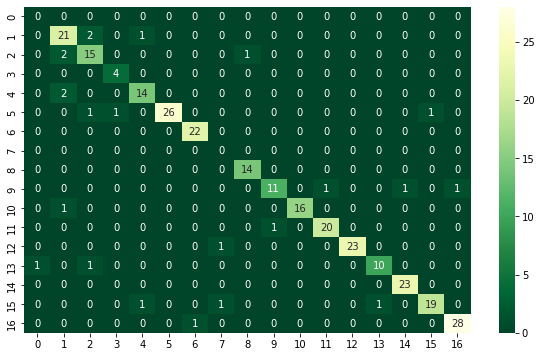

In [272]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

plt.figure(figsize=(10,6))
predictions = model.predict(tf_id_test)
print(classification_report(predictions,y_test))
sns.heatmap(confusion_matrix(predictions,y_test),cmap='YlGn_r',annot=True)

In [281]:
website ="https://www.reddit.com/r/Bitcoin/"
website_prediction(website,loaded_model)

The website is under the category of Cryptocurrency


In [282]:
import tensorflow_hub as hub
import tensorflow_text as text

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [220]:
df = pd.read_csv("website_classification.csv")
num_classes = len(df["Category"].value_counts())

In [222]:
df['Category'] = le.fit_transform(df['Category'])

In [223]:
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_website_text'], df['Category'], test_size=0.2, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train.values, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test.values, num_classes=num_classes)

In [224]:
def get_sentence_embedding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [231]:
#BERT layers
text_input = tf.keras.layers.Input(shape=(),dtype=tf.string,name="text")

preproccessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preproccessed_text)

#Neural Network layers
l = tf.keras.layers.Dropout(0.1,name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(17,activation='softmax',name='classifier')(l)

#constructing the model
model = tf.keras.Model(text_input,l)

In [232]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [233]:
METRICS = [
        tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS)

In [234]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
36/36 [==============================] - ETA: 0s - loss: 2.7705 - accuracy: 0.1124 - precision: 0.0000e+00 - recall: 0.0000e+00

KeyboardInterrupt: 